In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

import nltk
nltk.download('stopwords')
nltk.download('punct')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

from bs4 import BeautifulSoup

import re

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kavya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading punct: Package 'punct' not found in index


### dataset - Kaggle
## link: https://www.kaggle.com/datasets/kazanova/sentiment140

In [2]:
column =["Target","id","time","flag","user","tweet"]
originaldata = pd.read_csv("twittersentiment.csv",encoding='latin')
originaldata.columns=column

In [3]:
originaldata.head()

,Target,id,time,flag,user,tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


## Cleaning

In [4]:
#removing the unwanted columns : id , time, flag,user
data = originaldata
data = data.drop(["id","time","flag","user"],axis=1)
data.head()

,Target,tweet
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [5]:
#removing for nan or null values - since our data depends on only the tweet column, is its nan or null, it doesnt provide any info
#hence we are removing
data.isna().sum()

Target    0
tweet     0
dtype: int64

In [6]:
data.duplicated().sum()

16309

## Analyze and visualize

In [7]:
# from the website:
# 4- positive
# 2- neutral
# 0- negative
data["Target"].value_counts()

Target
4    800000
0    799999
Name: count, dtype: int64

In [8]:
#graph
import seaborn as sns
#from wordcloud import WordCloud
import matplotlib.pyplot as plt

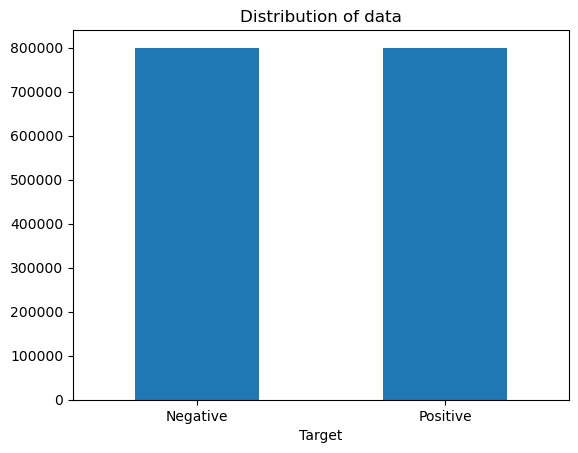

In [9]:
# Plotting the distribution for dataset.
ax = data.groupby('Target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(data['tweet']), list(data['Target'])

In [10]:
data['Target'].unique()

array([0, 4], dtype=int64)

In [11]:
#convert to lower case
data['tweet']=data['tweet'].str.lower()
data['tweet'].tail()

1599994    just woke up. having no school is the best fee...
1599995    thewdb.com - very cool to hear old walt interv...
1599996    are you ready for your mojo makeover? ask me f...
1599997    happy 38th birthday to my boo of alll time!!! ...
1599998    happy #charitytuesday @thenspcc @sparkscharity...
Name: tweet, dtype: object

In [12]:
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [13]:
def stripHTML(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

def removeSqBkts(text):
    return re.sub('\[[^]]*\]', '', text)

In [14]:
def denoiseText(text):
    text = stripHTML(text)
    text = removeSqBkts(text)
    return text

In [15]:
data['tweet'] = data['tweet'].apply(denoiseText)

C:\Users\kavya\AppData\Local\Temp\ipykernel_11832\81072512.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'html.parser')


In [16]:
def removeSplCh(text):
    pattern = r'[^a-zA-Z0-9\s]'
    text = re.sub(pattern, '', text)
    return text

In [17]:
data['tweet'] = data['tweet'].apply(removeSplCh)

In [18]:
def myStemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [19]:
data['tweet'] = data['tweet'].apply(myStemmer)

In [20]:
stopwordList = nltk.corpus.stopwords.words('english')
print(stopwordList)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [21]:
stop = set(stopwords.words('english'))

In [22]:
def removeStopWords(text):
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    filteredTokens = [token for token in tokens if token.lower() not in stopwordList]
    filteredText = ' '.join(filteredTokens)
    return filteredText

In [23]:
data['tweet'] = data['tweet'].apply(removeStopWords)

In [24]:
X=data.tweet
y=data.Target

In [25]:
xTrain, xTest, yTrain, yTest = train_test_split(X,y, test_size=0.33, random_state=42)

In [26]:
xTrain.shape

(1071999,)

In [27]:
yTrain.shape

(1071999,)

In [28]:
xTest.shape

(528000,)

In [29]:
yTest.shape

(528000,)

In [30]:
dfPosReview = data[data['Target'] == 4]
dfPosReview

,Target,tweet
799999,4,love health4uandpet u guy r best
800000,4,im meet one besti tonight cant wait girl talk
800001,4,darealsunisakim thank twitter add sunisa got m...
800002,4,sick realli cheap hurt much eat real food plu ...
800003,4,lovesbrooklyn2 ha effect everyon
...,...,...
1599994,4,woke school best feel ever
1599995,4,thewdbcom veri cool hear old walt interview ht...
1599996,4,readi mojo makeov ask detail
1599997,4,happi 38th birthday boo alll time tupac amaru ...


<function matplotlib.pyplot.show(close=None, block=None)>

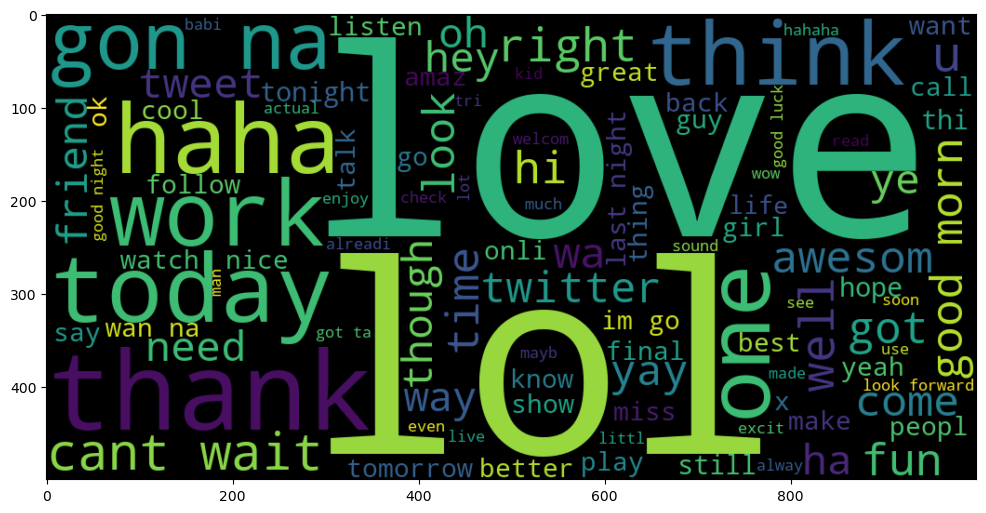

In [31]:
plt.figure(figsize= (12, 12))
dfPosReview = data[data['Target'] == 4]
posText = ' '.join(review for review in dfPosReview.tweet)
WC = WordCloud(width = 1000, 
               height = 500,
              max_words= 100)
posWords = WC.generate(posText)
plt.imshow(posWords,
          interpolation= 'bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

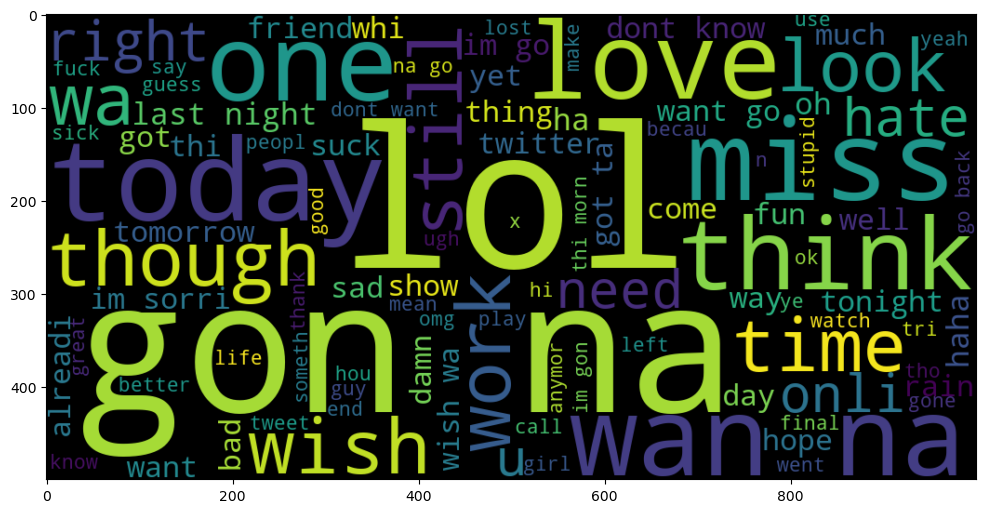

In [32]:
plt.figure(figsize= (12, 12))
dfNegReview = data[data['Target'] == 0]
negText = ' '.join(review for review in dfNegReview.tweet)
WC = WordCloud(width = 1000, 
               height = 500,
              max_words= 100)
negWords = WC.generate(negText)
plt.imshow(negWords,
          interpolation= 'bilinear')
plt.show

In [33]:
cv = CountVectorizer(min_df= 0.0,
                    max_df= 1,
                    binary= False,
                    ngram_range= (1, 3))

cvTrainReviews = cv.fit_transform(xTrain)
cvTestReviews = cv.transform(xTest)

In [34]:
cvTrainReviews.shape

(1071999, 8143529)

In [35]:
cvTestReviews.shape

(528000, 8143529)

In [36]:
mnb = MultinomialNB()
mnbCV = mnb.fit(cvTrainReviews, yTrain)

In [37]:
mnbpred = mnb.predict(cvTestReviews)
mnbscore= accuracy_score(yTest, mnbpred)
mnbscore

0.5629640151515152

In [39]:
lr = LogisticRegression(random_state=0).fit(cvTrainReviews, yTrain)
lrpred = lr.predict(cvTestReviews)
lrscore= accuracy_score(yTest, lrpred)
lrscore

0.5640075757575758